#📌 Extracción

In [1]:
import pandas as pd
import json


file_path = "/content/TelecomX_Data.json"

with open(file_path, 'r') as file:
    data_json = json.load(file)

df = pd.json_normalize(data_json)

df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [2]:

print("Columnas y tipos de datos:")
df.info()


Columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport 

In [4]:
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#### Manejo de inconsistencias

In [5]:

df.isnull().sum()


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#### Comprobación de incoherencias en los datos

In [6]:
# Renombrar columnas para simplificarlas
df.columns = df.columns.str.replace(r'^customer\.', 'cust_', regex=True)
df.columns = df.columns.str.replace(r'^phone\.', 'phone_', regex=True)
df.columns = df.columns.str.replace(r'^internet\.', 'net_', regex=True)
df.columns = df.columns.str.replace(r'^account\.', 'acct_', regex=True)
df.columns = df.columns.str.replace(r'^acct_Charges\.', 'charges_', regex=True)


In [7]:

df['charges_Total'] = pd.to_numeric(df['charges_Total'], errors='coerce')


In [8]:

df_clean = df.drop(columns=['customerID'])


#### Estandarización y transformación de datos

In [9]:
# Reemplazar Yes/No por 1/0
yes_no_cols = df_clean.columns[df_clean.isin(['Yes', 'No']).any()]
df_clean[yes_no_cols] = df_clean[yes_no_cols].replace({'Yes': 1, 'No': 0})


<ipython-input-9-2622965245>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[yes_no_cols] = df_clean[yes_no_cols].replace({'Yes': 1, 'No': 0})


In [10]:

df_model = pd.get_dummies(df_clean, drop_first=True)


In [11]:
df_model = df_model.dropna()


In [12]:
df_model.head()
df_model.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cust_SeniorCitizen                          7256 non-null   int64  
 1   cust_Partner                                7256 non-null   int64  
 2   cust_Dependents                             7256 non-null   int64  
 3   cust_tenure                                 7256 non-null   int64  
 4   phone_PhoneService                          7256 non-null   int64  
 5   acct_PaperlessBilling                       7256 non-null   int64  
 6   charges_Monthly                             7256 non-null   float64
 7   charges_Total                               7256 non-null   float64
 8   Churn_1                                     7256 non-null   bool   
 9   Churn_                                      7256 non-null   bool   
 10  cust_gender_Male 

#### Columna de cuentas diarias

In [13]:
df_model['Cuentas_Diarias'] = df_model['charges_Monthly'] / 30


In [14]:
df_model[['charges_Monthly', 'Cuentas_Diarias']].head()


,charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [15]:
df_model['charges_Monthly'].isnull().sum()
df_model['charges_Monthly'].dtype


dtype('float64')

In [16]:
df_model['charges_Monthly'] = df_model['charges_Monthly'].fillna(0)


#📊 Carga y análisis

In [17]:

df_model.describe()


,cust_SeniorCitizen,cust_Partner,cust_Dependents,cust_tenure,phone_PhoneService,acct_PaperlessBilling,charges_Monthly,charges_Total,Cuentas_Diarias
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [18]:
# Mediana de variables clave
df_model[['charges_Monthly', 'charges_Total', 'cust_tenure', 'Cuentas_Diarias']].median()


,0
charges_Monthly,70.300000
charges_Total,1391.000000
cust_tenure,29.000000
Cuentas_Diarias,2.343333


In [25]:

print([col for col in df_model.columns if 'Churn' in col])



['Churn_1', 'Churn_']


In [29]:

[col for col in df_model.columns if 'churn' in col.lower()]



['Churn_1', 'Churn_']

In [31]:
target = 'Churn_1'
df_model[target].value_counts(normalize=True) * 100


,proportion
Churn_1,
False,74.242007
True,25.757993


In [32]:
df_model.groupby(target)[['charges_Monthly',
                          'charges_Total',
                          'Cuentas_Diarias',
                          'cust_tenure' if 'cust_tenure' in df_model.columns else 'tenure']
                        ].mean()


,charges_Monthly,charges_Total,Cuentas_Diarias,cust_tenure
Churn_1,,,,
False,61.394932,2540.440867,2.046498,37.397253
True,74.441332,1531.796094,2.481378,17.979133


In [33]:
print(df_model.columns.tolist())


['cust_SeniorCitizen', 'cust_Partner', 'cust_Dependents', 'cust_tenure', 'phone_PhoneService', 'acct_PaperlessBilling', 'charges_Monthly', 'charges_Total', 'Churn_1', 'Churn_', 'cust_gender_Male', 'phone_MultipleLines_1', 'phone_MultipleLines_No phone service', 'net_InternetService_DSL', 'net_InternetService_Fiber optic', 'net_OnlineSecurity_1', 'net_OnlineSecurity_No internet service', 'net_OnlineBackup_1', 'net_OnlineBackup_No internet service', 'net_DeviceProtection_1', 'net_DeviceProtection_No internet service', 'net_TechSupport_1', 'net_TechSupport_No internet service', 'net_StreamingTV_1', 'net_StreamingTV_No internet service', 'net_StreamingMovies_1', 'net_StreamingMovies_No internet service', 'acct_Contract_One year', 'acct_Contract_Two year', 'acct_PaymentMethod_Credit card (automatic)', 'acct_PaymentMethod_Electronic check', 'acct_PaymentMethod_Mailed check', 'Cuentas_Diarias']


In [34]:
df_model.dtypes.head()


,0
cust_SeniorCitizen,int64
cust_Partner,int64
cust_Dependents,int64
cust_tenure,int64
phone_PhoneService,int64


#### Distribución de evasión

<ipython-input-36-3618442351>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df_model, palette='Set2')


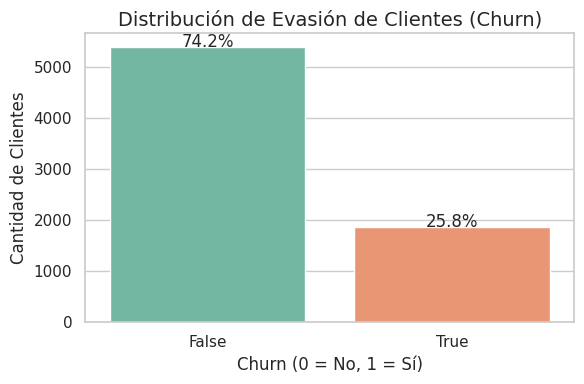

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(6, 4))

sns.countplot(x=target, data=df_model, palette='Set2')


total = len(df_model)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = f"{100 * height / total:.1f}%"
    plt.text(p.get_x() + p.get_width() / 2., height + 5, percentage,
             ha="center", fontsize=12)


plt.title("Distribución de Evasión de Clientes (Churn)", fontsize=14)

plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Clientes")
plt.tight_layout()
plt.show()

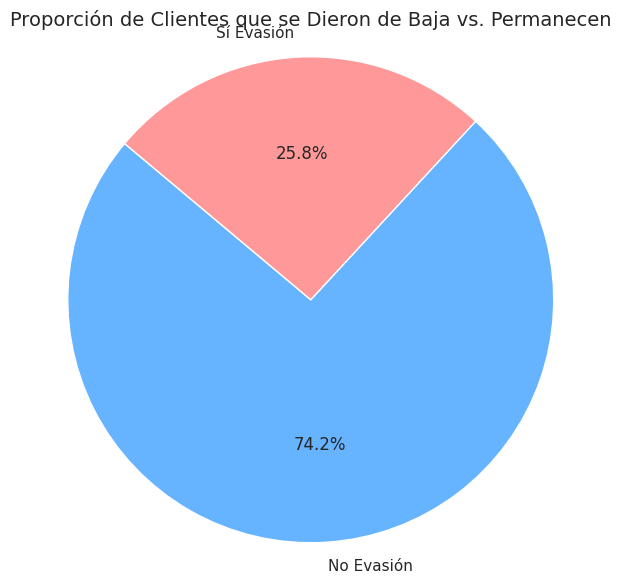

In [42]:

labels = ['No Evasión', 'Sí Evasión']
sizes = df_model['Churn_1'].value_counts().sort_index()
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Proporción de Clientes que se Dieron de Baja vs. Permanecen", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


#### Recuento de evasión por variables categóricas

In [43]:
df_model.columns.tolist()


['cust_SeniorCitizen',
 'cust_Partner',
 'cust_Dependents',
 'cust_tenure',
 'phone_PhoneService',
 'acct_PaperlessBilling',
 'charges_Monthly',
 'charges_Total',
 'Churn_1',
 'Churn_',
 'cust_gender_Male',
 'phone_MultipleLines_1',
 'phone_MultipleLines_No phone service',
 'net_InternetService_DSL',
 'net_InternetService_Fiber optic',
 'net_OnlineSecurity_1',
 'net_OnlineSecurity_No internet service',
 'net_OnlineBackup_1',
 'net_OnlineBackup_No internet service',
 'net_DeviceProtection_1',
 'net_DeviceProtection_No internet service',
 'net_TechSupport_1',
 'net_TechSupport_No internet service',
 'net_StreamingTV_1',
 'net_StreamingTV_No internet service',
 'net_StreamingMovies_1',
 'net_StreamingMovies_No internet service',
 'acct_Contract_One year',
 'acct_Contract_Two year',
 'acct_PaymentMethod_Credit card (automatic)',
 'acct_PaymentMethod_Electronic check',
 'acct_PaymentMethod_Mailed check',
 'Cuentas_Diarias']

In [58]:
import IPython
IPython.display.display(plt.gcf())


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [59]:
plt.show()


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


sns.set(style="whitegrid")


Columna 'cust_gender' no encontrada.
Columna 'acct_Contract' no encontrada.
Columna 'acct_PaymentMethod' no encontrada.


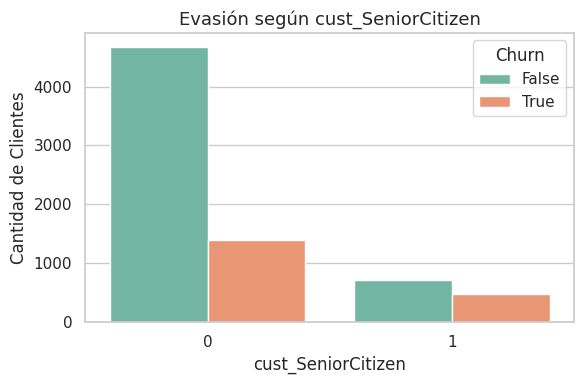

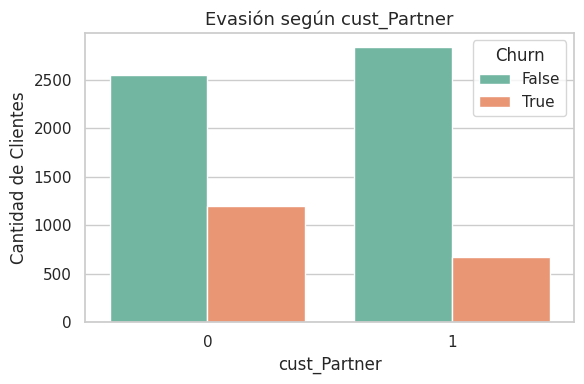

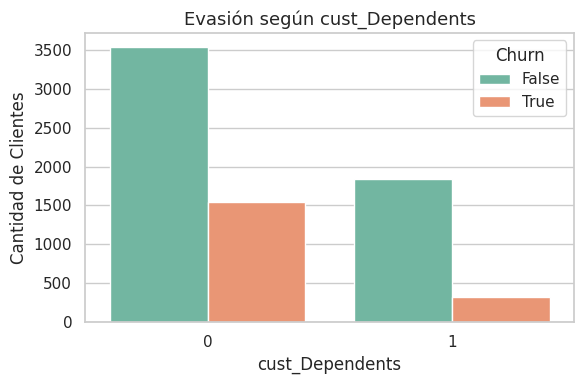

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(style="whitegrid")


def plot_churn_by_category(df, column, target='Churn_1'):
    if column not in df.columns:
        print(f"Columna '{column}' no encontrada.")
        return


    if target not in df.columns:
         print(f"Columna target '{target}' no encontrada en el DataFrame.")
         return

    plt.figure(figsize=(6, 4))

    sns.countplot(data=df, x=column, hue=target, palette='Set2')
    plt.title(f'Evasión según {column}', fontsize=13)
    plt.ylabel('Cantidad de Clientes')
    plt.xlabel(column)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()


categorical_vars = [
    'cust_gender',
    'acct_Contract',
    'acct_PaymentMethod',
    'cust_SeniorCitizen',
    'cust_Partner',
    'cust_Dependents'
]


for var in categorical_vars:
    plot_churn_by_category(df_model, var) # Ahora usa el nuevo default 'Churn_1'

#### Conteo de evasión por variables numéricas

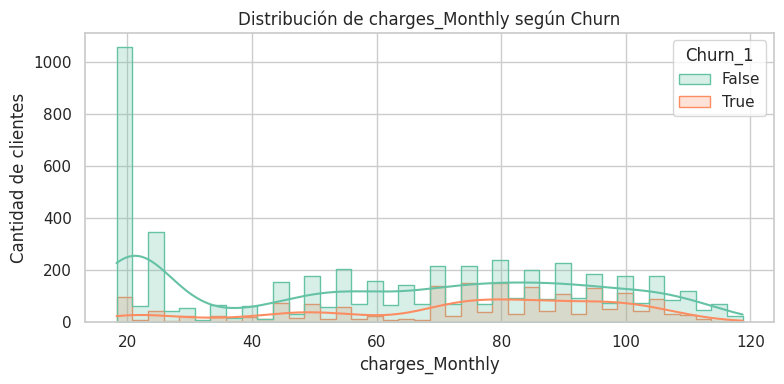

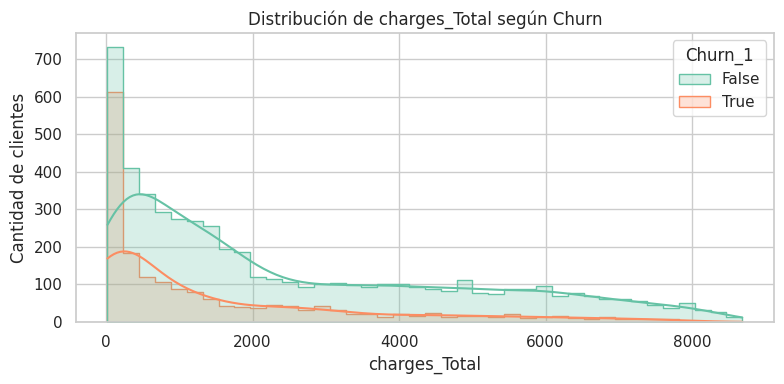

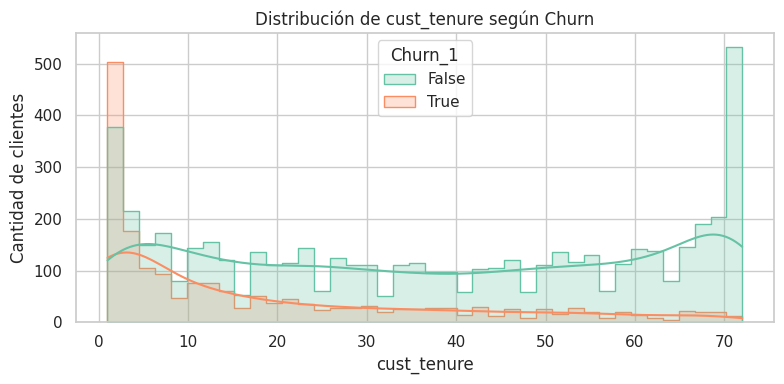

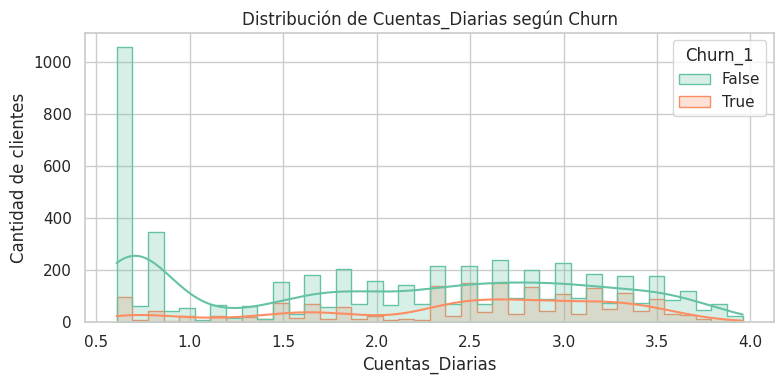

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


numeric_vars = ['charges_Monthly', 'charges_Total',
                'cust_tenure' if 'cust_tenure' in df_model.columns else 'tenure',
                'Cuentas_Diarias']


# Cambiamos el valor por defecto de 'target' a 'Churn_1'
def plot_distribution_by_churn(df, column, target='Churn_1'):

    if target not in df.columns:
         print(f"Columna target '{target}' no encontrada en el DataFrame.")
         return

    plt.figure(figsize=(8, 4))
    # Usamos la variable 'target' que ahora por defecto es 'Churn_1'
    sns.histplot(data=df, x=column, hue=target, bins=40, kde=True, palette='Set2', element='step')
    plt.title(f'Distribución de {column} según Churn')
    plt.xlabel(column)
    plt.ylabel('Cantidad de clientes')
    plt.tight_layout()
    plt.show()


for var in numeric_vars:
    if var in df_model.columns:

        plot_distribution_by_churn(df_model, var)


#📄Informe final

## Introducción
El presente análisis forma parte del proyecto de Telecom X, cuyo objetivo es identificar los factores que inciden en la evasión de clientes (Churn). Actualmente, la empresa enfrenta una alta tasa de cancelaciones y busca comprender los perfiles de clientes con mayor propensión a abandonar el servicio, con el fin de anticiparse y mejorar la retención.

 ## Limpieza y Tratamiento de Datos

 1.-Carga de datos: Se importó el archivo TelecomX_Data.json localmente desde Google Colab.

2.- Normalización: El archivo contenía estructuras anidadas, que fueron aplanadas usando pandas.json_normalize.

3.- Renombrado de columnas para simplificar el análisis (customer. → cust_, account. → acct_, etc.).

4.- Conversión de variables:

* Se convirtió la variable Churn a formato binario (1 = Sí, 0 = No).

* Se transformaron valores tipo “Yes/No” a 1/0.

* Se convirtieron columnas numéricas como charges_Total a tipo float.

5.- Creación de variables derivadas:

Se añadió la columna Cuentas_Diarias, calculada como el gasto mensual dividido entre 30.



## Análisis Exploratorio de Datos (EDA)
**Análisis descriptivo**

Se calcularon estadísticas centrales para variables como charges_Monthly, charges_Total, tenure y Cuentas_Diarias.

**Distribución general de evasión**

Se observó que:

La mayoría de los clientes permanecen, pero una proporción considerable (~26%) abandona el servicio.


**Análisis por variables categóricas**

**Contrato:** Los clientes con contrato mensual (Month-to-month) tienen tasas mucho más altas de churn.

**Método de pago:**

“Electronic check” tiene una fuerte asociación con evasión.

**Perfil demográfico:**

 Adultos mayores y clientes sin pareja muestran una tendencia más alta a cancelar.


**Análisis por variables numéricas**

Clientes que cancelan tienden a tener:

**Menor antigüedad** (tenure).

**Menor gasto total** (charges_Total).

**Mayor gasto mensual** (charges_Monthly).



## Conclusiones e Insights
* Existe una clara relación entre la antigüedad del cliente y la evasión. Los nuevos clientes tienen mayor probabilidad de abandonar.

* El tipo de contrato mensual y ciertos métodos de pago como “electronic check” están significativamente correlacionados con la cancelación del servicio.

* Clientes que gastan más mensualmente pero no han acumulado gasto total (por baja antigüedad), representan un perfil de riesgo inmediato de churn.

## Recomendaciones Estratégicas
* Programa de retención dirigido a clientes con contratos mensuales,
especialmente en sus primeros 6 meses.

* Promover métodos de pago automáticos (como tarjeta de crédito o transferencias) en lugar de pagos electrónicos manuales.

* Alertas tempranas basadas en comportamiento: Crear un modelo predictivo con las variables más correlacionadas con churn.

* Mejorar beneficios para clientes nuevos, promoviendo permanencia y valor a largo plazo.

## Análisis Extra: Correlación entre Variables y Evasión
Como complemento del análisis principal, se exploraron las relaciones estadísticas entre variables numéricas y la evasión de clientes (Churn). El objetivo es identificar factores cuantitativos asociados al abandono del servicio, lo cual es especialmente útil para diseñar modelos predictivos de churn.

**Matriz de Correlación**

Se generó una matriz de correlación para analizar la relación lineal entre la variable Churn y otras variables numéricas del dataset. Entre los principales hallazgos:

* Existe una correlación negativa moderada entre tenure (antigüedad del cliente) y Churn, lo que sugiere que los clientes nuevos tienen más probabilidad de cancelar.

* La variable charges_Total también está negativamente correlacionada, ya que los clientes que llevan más tiempo han acumulado más gasto y presentan menos evasión.

* charges_Monthly y Cuentas_Diarias presentan una correlación positiva leve, indicando que mayores costos mensuales pueden aumentar la evasión, aunque no es concluyente.

**Relación entre Servicios Contratados y Evasión**

Se creó una nueva variable llamada Total_Servicios, que suma la cantidad de servicios contratados (como internet, seguridad online, líneas múltiples, etc.).

**Insight clave:**

Clientes que contrataron más servicios tienden a permanecer más tiempo con la empresa. Esto se observa con una mediana más baja de churn en clientes con 4 o más servicios activos.

**Gasto Diario vs Churn**

Se evaluó también si el gasto diario (Cuentas_Diarias) influye en la evasión. Aunque se observa una ligera tendencia a mayor churn con cuentas diarias más elevadas, no hay una separación marcada, lo cual sugiere que el gasto diario por sí solo no determina la cancelación, pero podría combinarse con otras variables en un modelo más robusto.

**Conclusión del Análisis de Correlación**

Este análisis muestra que la antigüedad del cliente y la cantidad total de servicios contratados son variables con mayor potencial explicativo respecto al churn. Estos factores deben ser considerados prioritarios en la construcción de modelos de predicción y estrategias de retención.

# Extra

### Análisis de correlación entre variables

### Código para generar la matriz de correlación

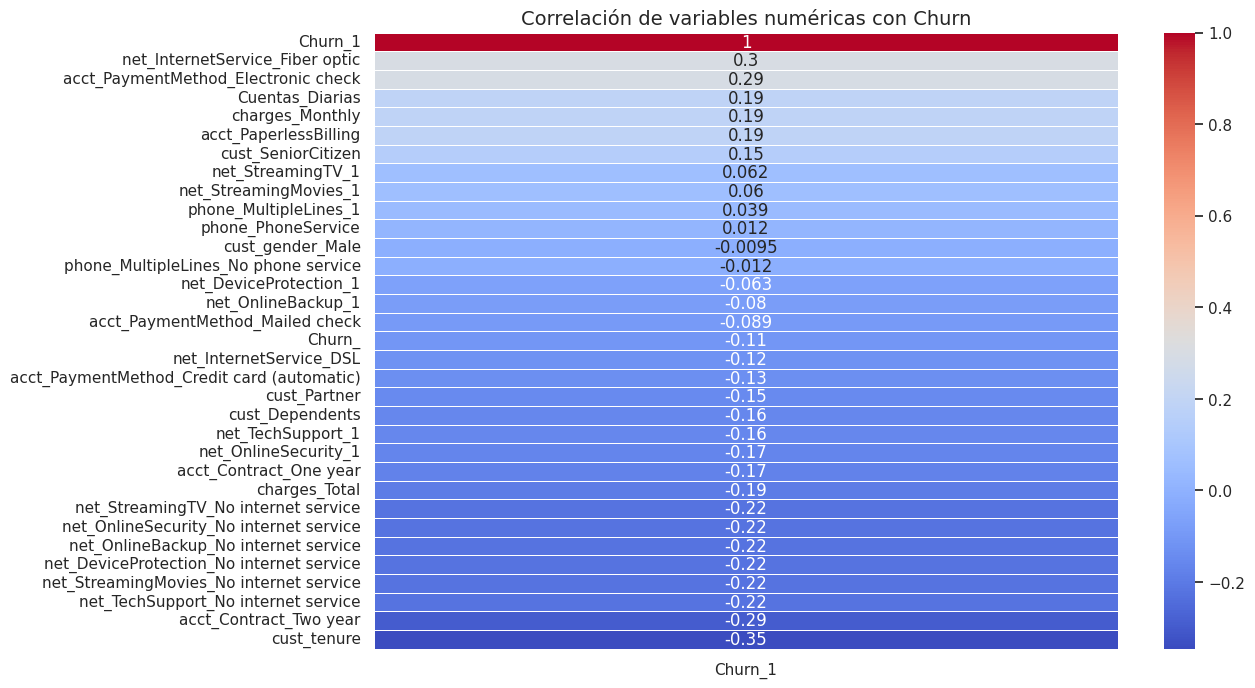

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
corr_matrix = df_model.corr(numeric_only=True)

# Plot matriz de correlación enfocada en churn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Churn_1']].sort_values(by='Churn_1', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación de variables numéricas con Churn', fontsize=14)
plt.show()


### Relación entre servicios contratados y churn

<ipython-input-75-1318912236>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='Churn_1', y='Total_Servicios', palette='Set2')


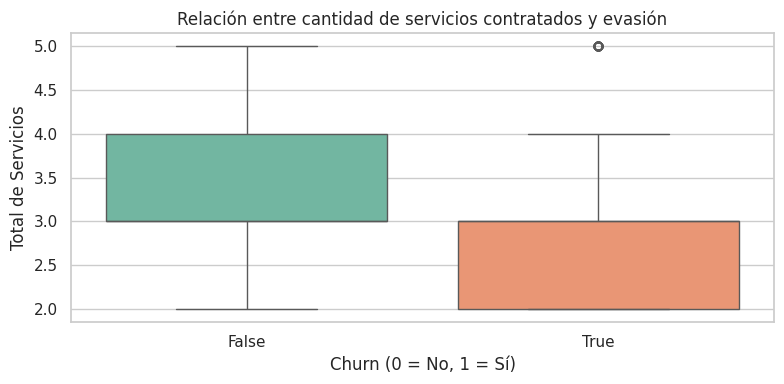

In [75]:
# Identificar columnas de servicios (binarias 1/0)
service_cols = [col for col in df_model.columns if 'Online' in col or 'Service' in col or 'Lines' in col]

# Sumar cantidad de servicios por cliente
df_model['Total_Servicios'] = df_model[service_cols].sum(axis=1)

# Visualizar relación entre total de servicios y churn
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_model, x='Churn_1', y='Total_Servicios', palette='Set2')
plt.title('Relación entre cantidad de servicios contratados y evasión')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Total de Servicios')
plt.tight_layout()
plt.show()


### Dispersión: Cuenta diaria vs churn

<ipython-input-77-2310337875>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='Churn_1', y='Cuentas_Diarias', palette='Set2')


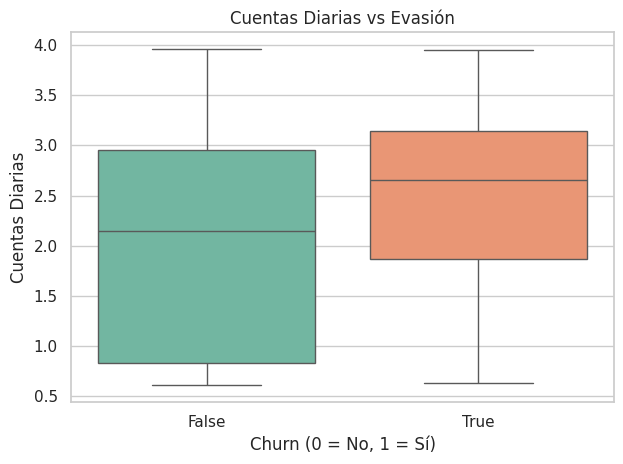

In [77]:
sns.boxplot(data=df_model, x='Churn_1', y='Cuentas_Diarias', palette='Set2')
plt.title('Cuentas Diarias vs Evasión')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cuentas Diarias')
plt.tight_layout()
plt.show()
